# Load data

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../MediaSharingIndex/Data/data.csv')  # Load main dataset
data = df.copy()

# Define global interest topics

In [15]:
ntopics = 10
topic_names = ['IV. Politics BA Province', 'III. Economy/Dolar', 'VIII. Justice', 'VII. Politics CL', 'V. 3rd Party', 'I. Wage/Inflation', 'II. Politics CR', 'VI. Elections', 'IX. Trash topic', 'X. Gossip & Sport']
topic_order = [1, 6, 5, 2, 3, 7, 4, 0]
colors_xticks = 'bbbrrbbb'

### Group Agenda

In [97]:
from math import pi

def radar_plot(distribution, topic_names, color, ax, label):
    # Número de variables que tenemos
    num_vars = len(topic_names)

    # Ángulos de cada eje en el radar plot (dividimos el círculo completo por el número de variables)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # El gráfico es circular, así que necesitamos "cerrar" el círculo:
    distribution += distribution[:1]
    angles += angles[:1]

    # Dibujar una línea para cada distribución
    ax.plot(angles, distribution, color=color, linewidth=2)
    # Rellenar el interior de la distribución
    ax.fill(angles, distribution, color=color, alpha=0.25, label = label)

    # Mejorar el gráfico
    ax.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])
    ax.set_yticklabels(['', '', '', 0.15, '', '', 0.30, ''], fontsize = 8)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(topic_names, bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1), fontweight = 'bold', color = 'black', alpha = 1.00, size = 24)
    ax.spines['polar'].set_visible(False)

    # Asegurarse de que los ticks de los ejes se distribuyan de manera uniforme y sean legibles
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < pi:
            label.set_horizontalalignment('center')
        else:
            label.set_horizontalalignment('center')

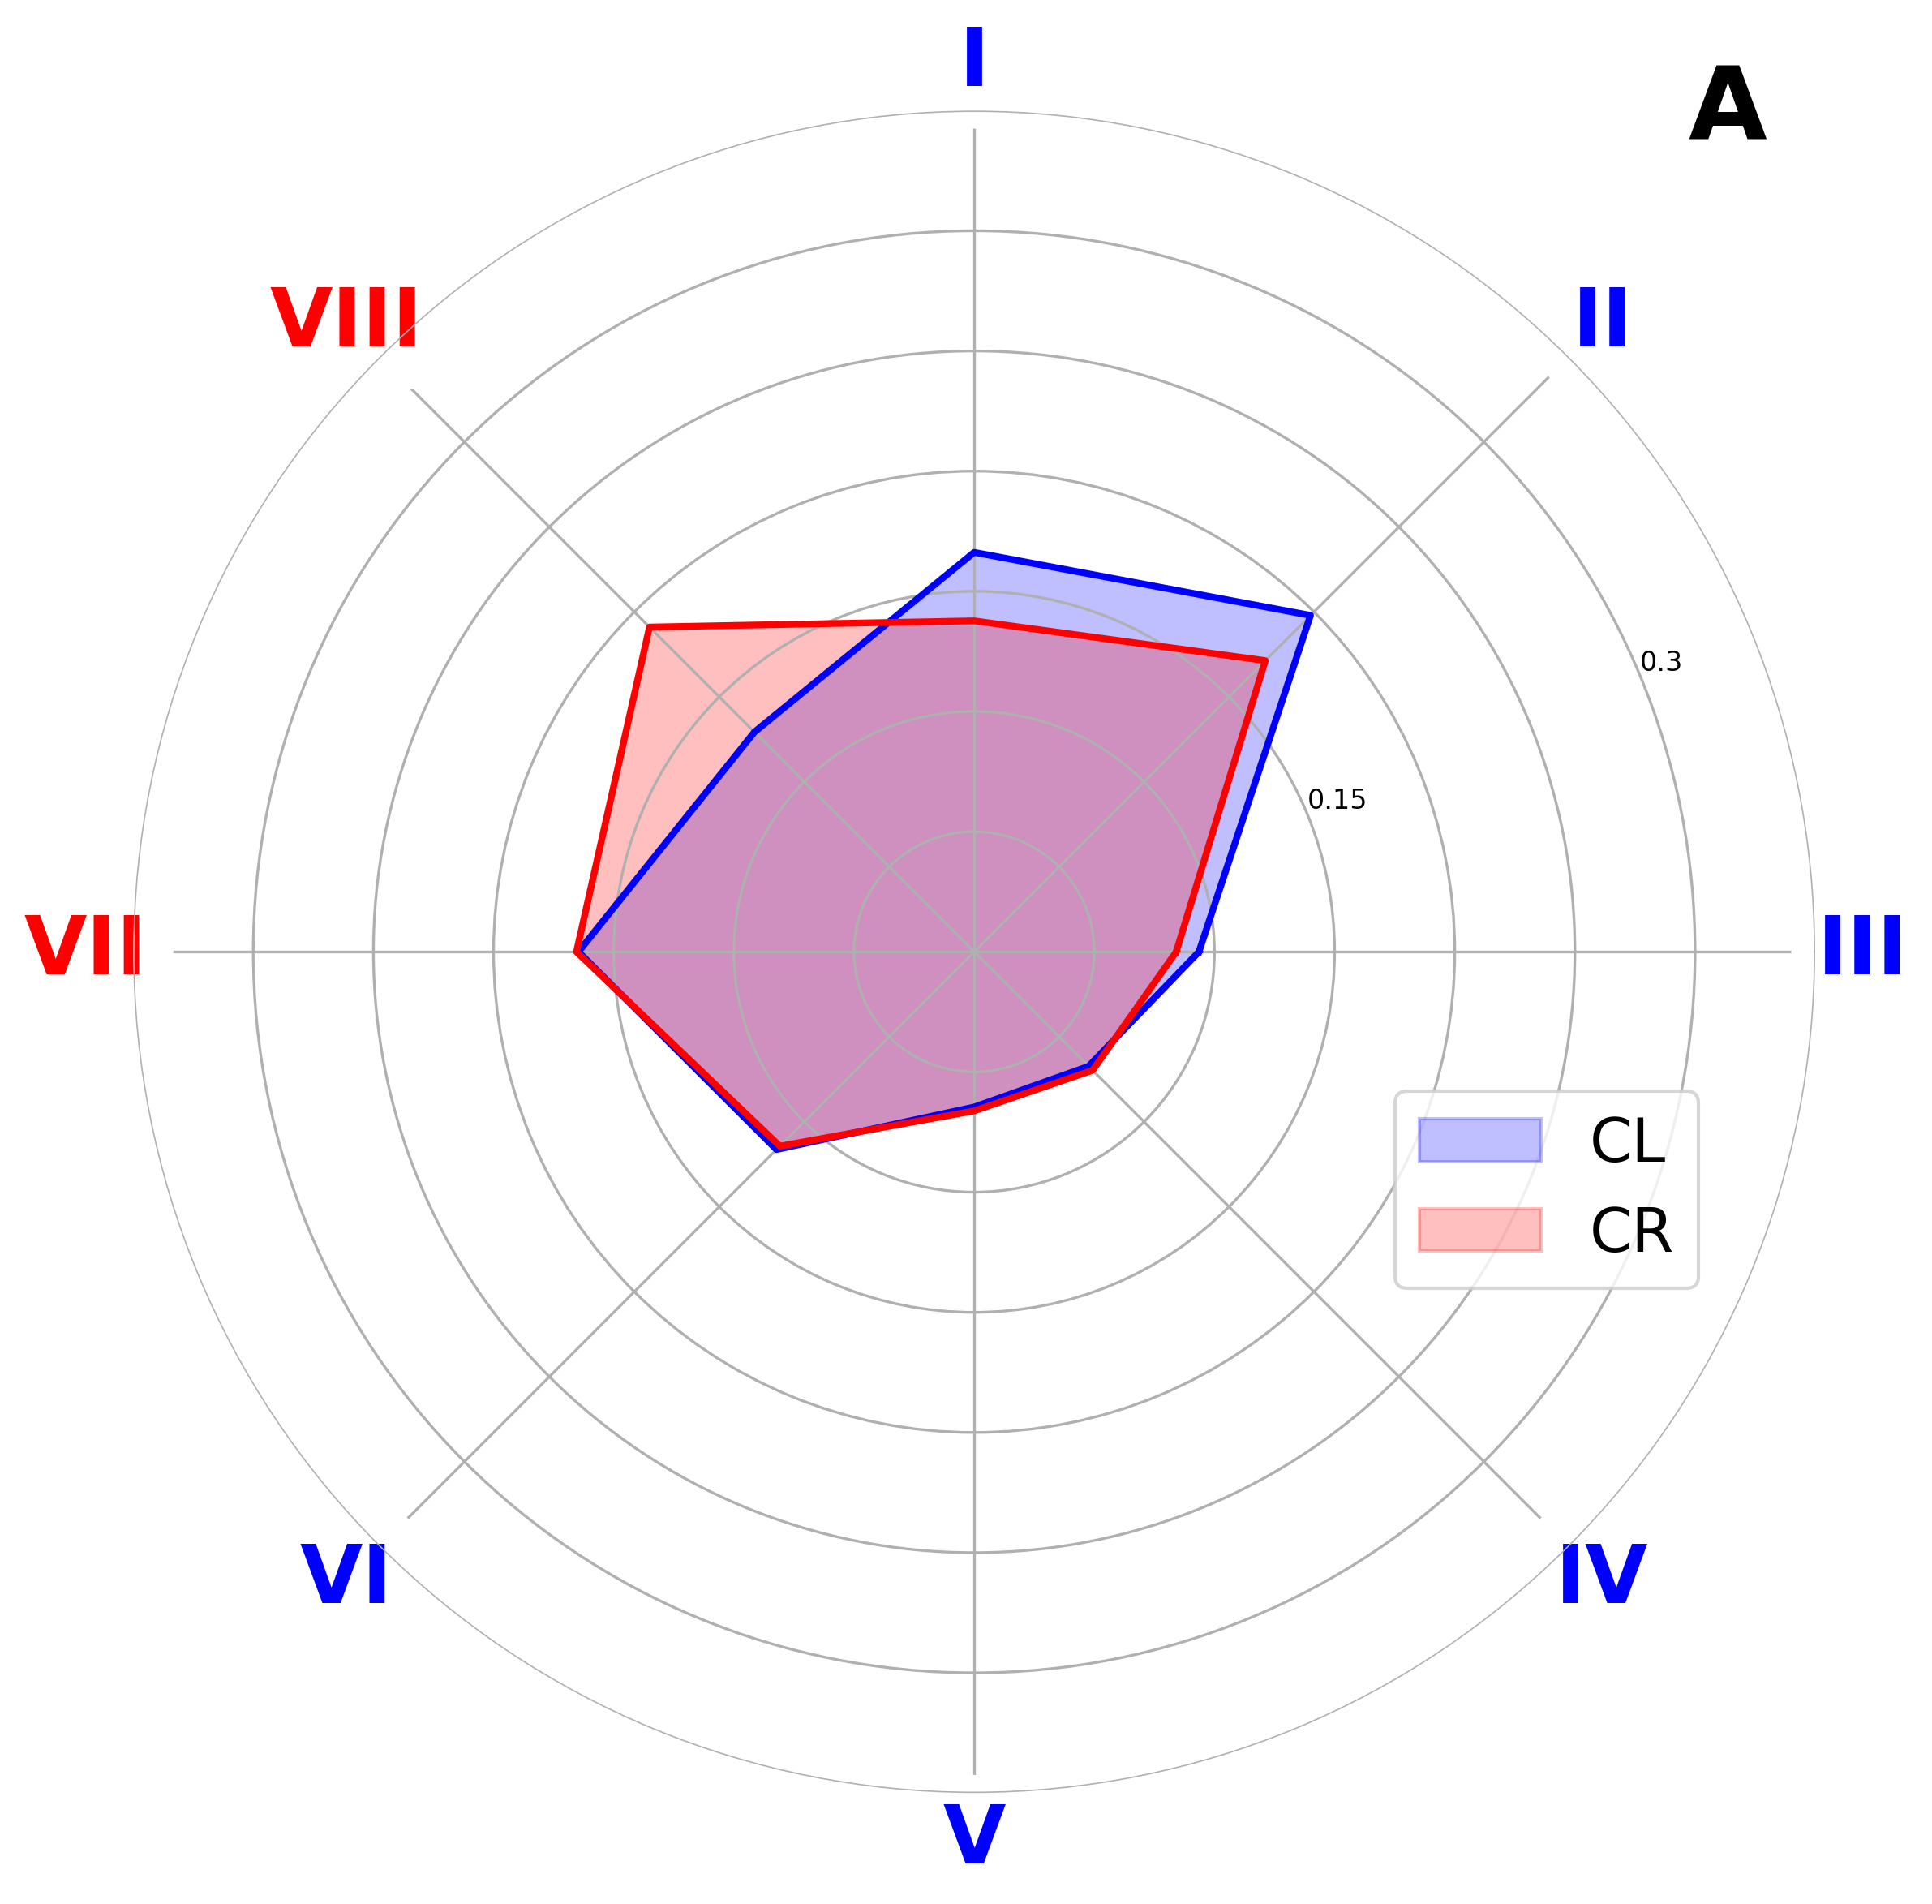

In [109]:
# Uso de la función
# Crear una figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True), dpi = 300)

colors = {'MP': 'r', 'FF': 'b'}
group_name = {'MP': 'CR', 'FF': 'CL'}

for group in ['FF', 'MP']:
    
    group_agenda = data[data.dynamic_opinion == group][[f'T{k}' for k in topic_order]].mean(axis = 0).to_list()
    group_agenda = list(np.array(group_agenda) / np.sum(group_agenda))
    
    radar_plot(distribution=group_agenda, topic_names=[topic_names[t].split('.')[0] for t in topic_order], color=colors[group], ax=ax, label = group_name[group])

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colors_xticks[i])

plt.text(0.85, 0.45, "A", fontweight = 'bold',fontsize = 30)
plt.legend(fontsize = 18, loc = [0.75, 0.30])
plt.tight_layout()
plt.savefig('New_figure5a.pdf')
plt.savefig('New_figure5a.png')
plt.show()

Per group per outlet:

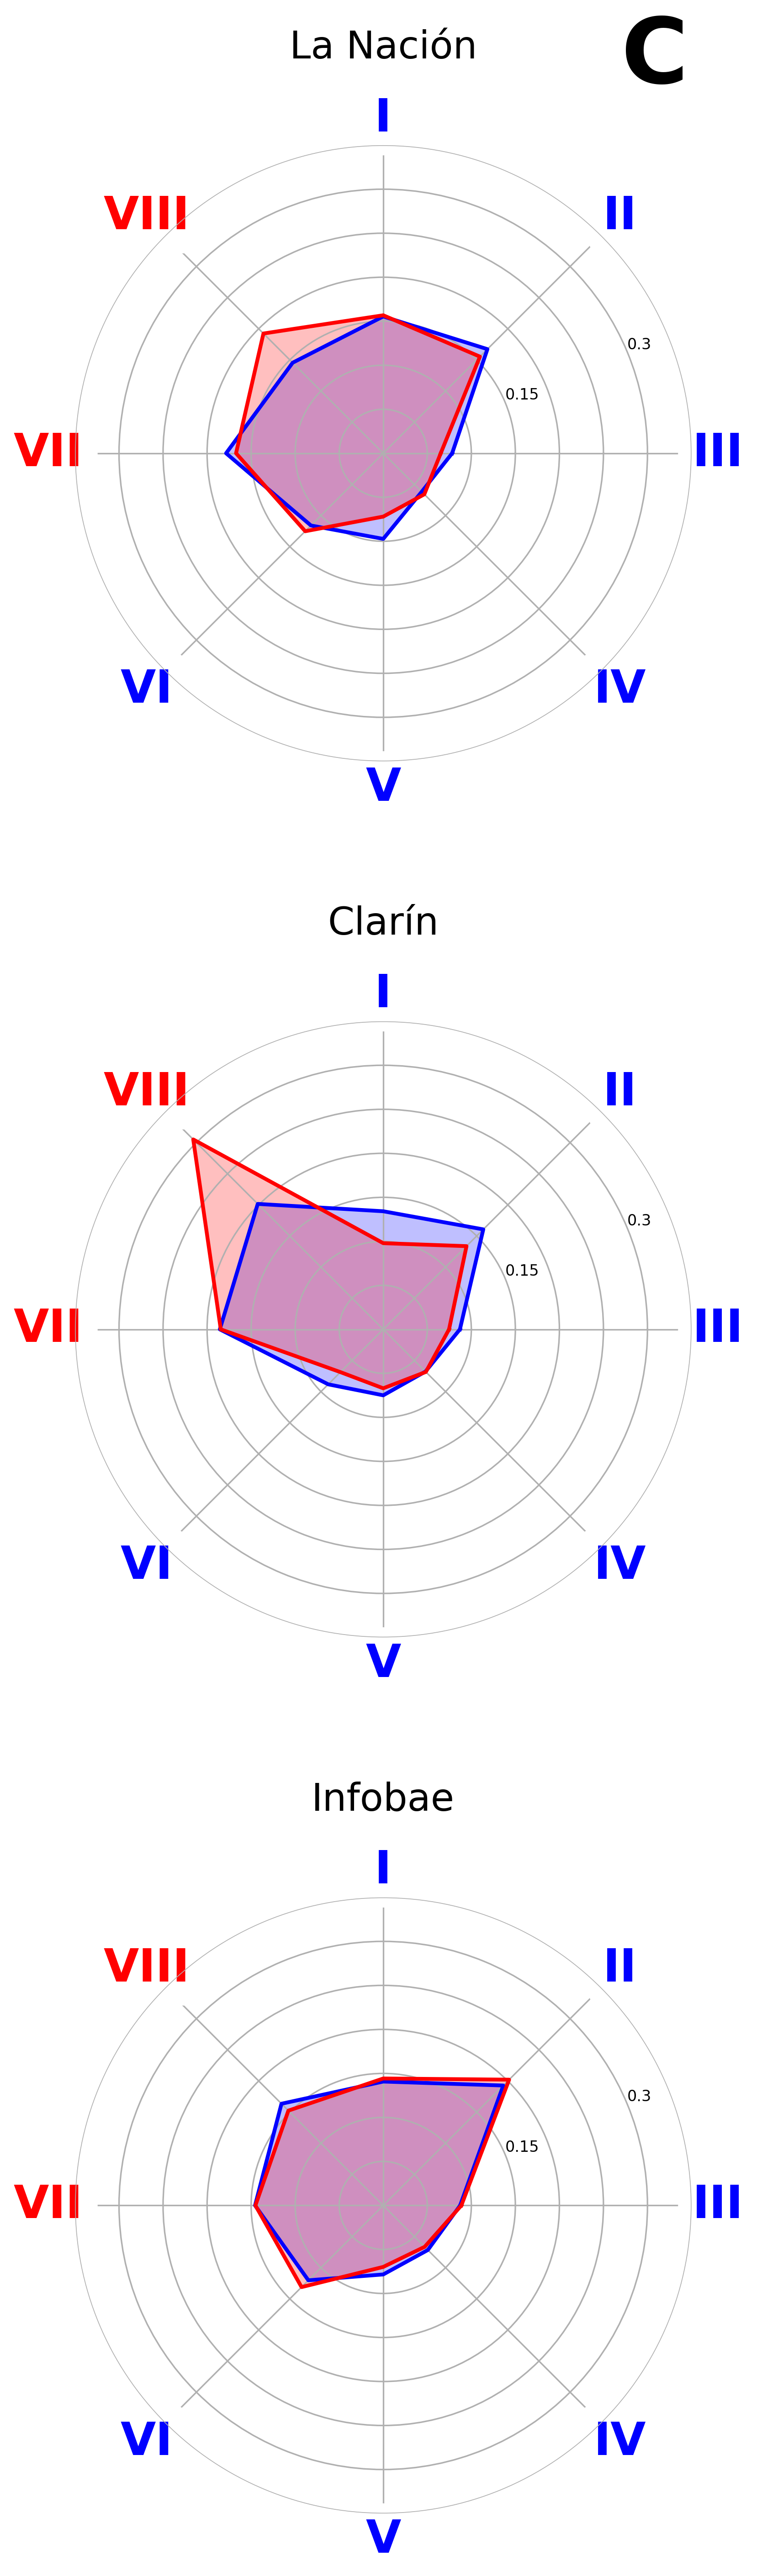

In [132]:
# Uso de la función
# Crear una figura
fig, ax = plt.subplots(figsize=(20, 20), ncols=1, nrows=3, subplot_kw=dict(polar=True), dpi = 300)

coordinates = {'Clarin': 1, 'La Nacion': 0, 'Infobae': 2}

colors = {'MP': 'r', 'FF': 'b'}
group_name = {'MP': 'CR', 'FF': 'CL'}

for outlet in ['La Nacion', 'Clarin', 'Infobae']:
    
    i = coordinates[outlet]
    
    for group in ['FF', 'MP']:
        
        group_agenda = data[(data.dynamic_opinion == group) & ((data.outlet == outlet))][[f'T{k}' for k in topic_order]].mean(axis = 0).to_list()
        group_agenda = list(np.array(group_agenda) / np.sum(group_agenda))
        
        radar_plot(distribution=group_agenda, topic_names=[topic_names[t].split('.')[0] for t in topic_order], color=colors[group], ax=ax[i], label = group_name[group])

    for k, label in enumerate(ax[i].get_xticklabels()):
        label.set_color(colors_xticks[k])

    ax[i].set_title(outlet, size = 20, pad = 20, loc = 'center')

    if outlet == 'Clarin':
        ax[i].set_title('Clarín', size = 20, pad = 20, loc = 'center')
    elif outlet == 'La Nacion':
        ax[i].set_title('La Nación', size = 20, pad = 20, loc = 'center')
        ax[i].text(1, 0.50, "C", fontweight = 'bold',fontsize = 48)
    elif outlet == 'Pagina 12':
        ax[i].set_title('Página 12', size = 20, pad = 20, loc = 'center')
    else:
        pass

plt.tight_layout(pad = 5)
plt.savefig('New_figure5c.pdf')
plt.savefig('New_figure5c.png')
plt.show()

### Difference in interest and SB 

In [100]:
# Pre-calculated
sb_topic = [-0.05644334023148842,
 -0.0694844591751829,
 0.040785706572236555,
 0.035920841482214194,
 -0.0559269162310333,
 -0.11205463504566897,
 -0.10288066541321059,
 -0.05583833816296598]

cl_agenda = data[data.dynamic_opinion == 'FF'][[f'T{k}' for k in range(8)]].mean(axis = 0).to_numpy()
cl_agenda /= cl_agenda.sum()
cr_agenda = data[data.dynamic_opinion == 'MP'][[f'T{k}' for k in range(8)]].mean(axis = 0).to_numpy()
cr_agenda /= cr_agenda.sum()

difference = cl_agenda - cr_agenda

difference_sorted = sorted(difference)
sb_sorted = sorted(sb_topic, key = lambda x: difference[list(sb_topic).index(x)])
topics_name_sorted = sorted(topic_names[:8], key = lambda x: difference[topic_names[:8].index(x)])

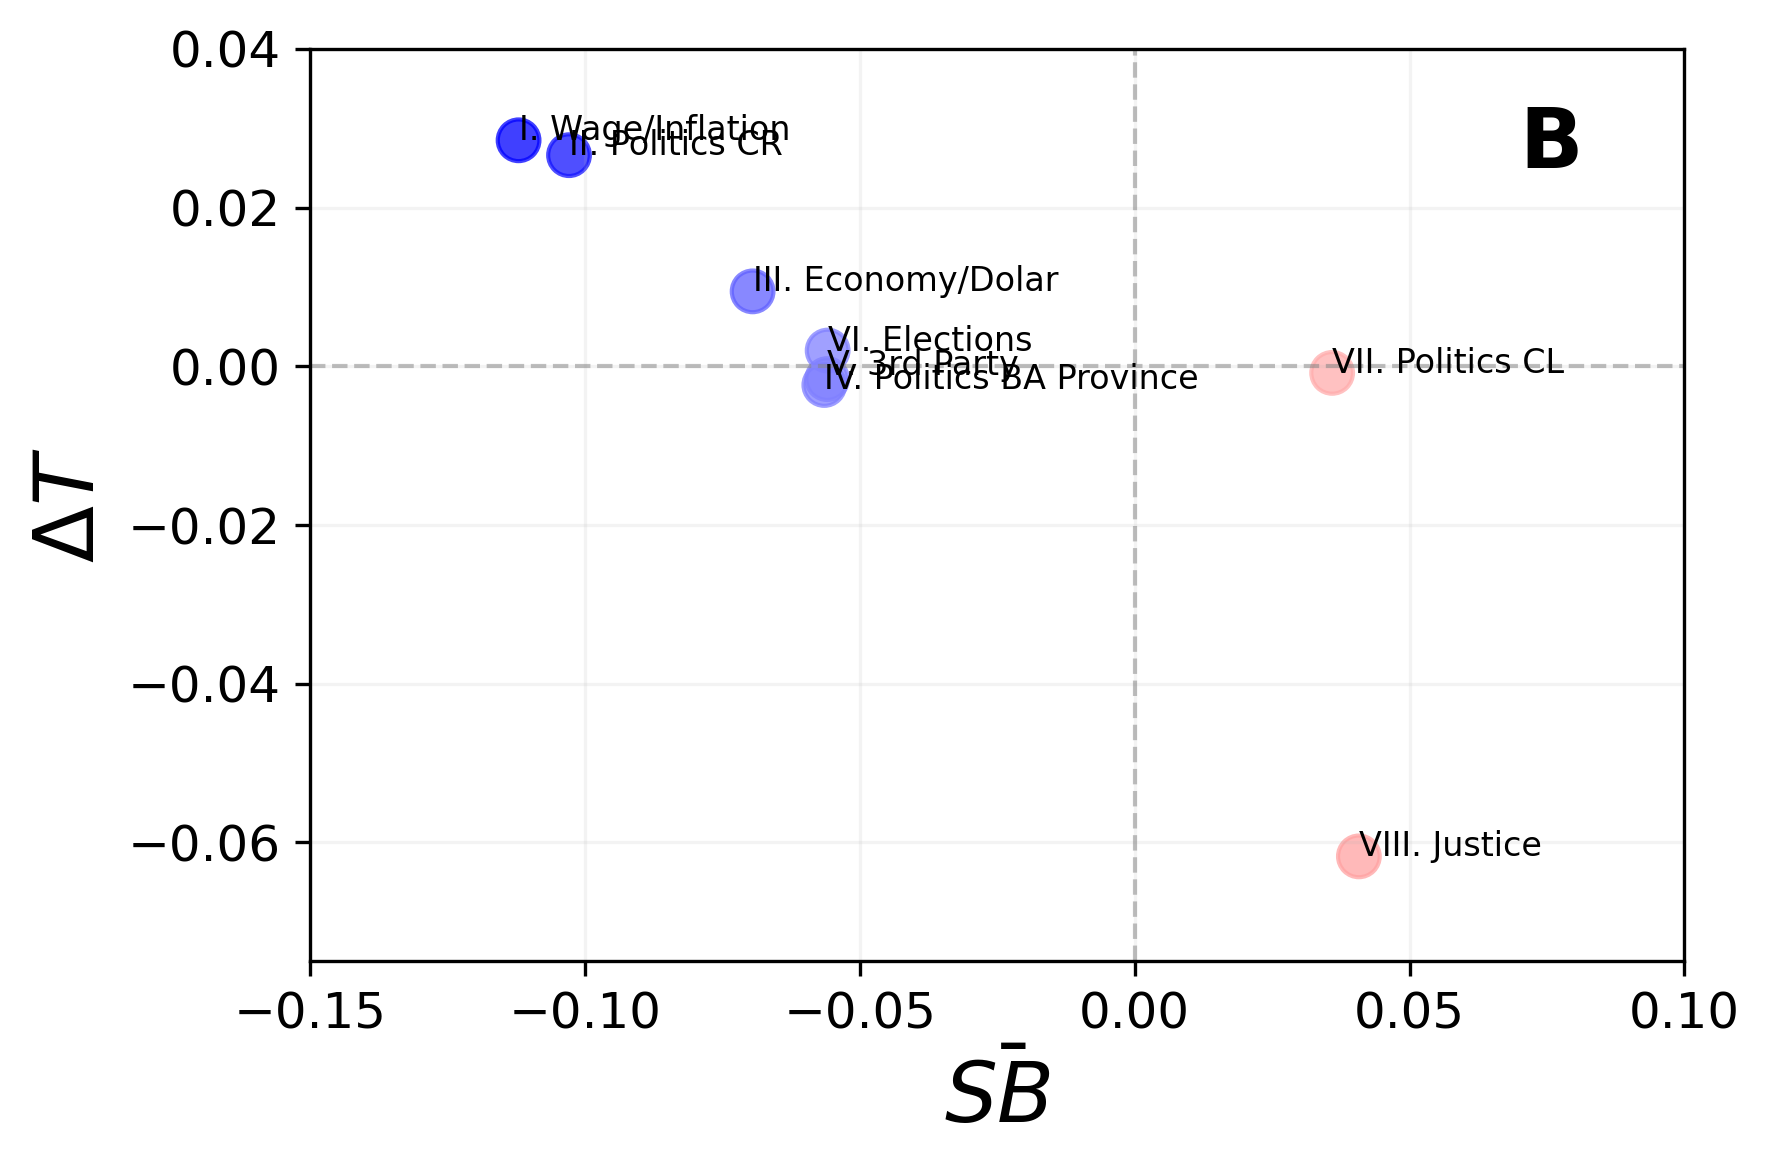

In [119]:
plt.figure(figsize=(6,4),dpi = 300)

# Scale of colors where SB = 0 is white and the most extreme case has the most extreme color
colors = plt.cm.bwr((-0.5 * np.array(sb_sorted)) / np.array(sb_sorted).min() + 0.5)

for i in range(len(difference_sorted)):
    
    if '3rd' in topics_name_sorted[i]:
        plt.text(sb_sorted[i], difference_sorted[i]+0.0005, s=topics_name_sorted[i], ma = 'center', size = 8)
    elif 'BA' in topics_name_sorted[i]:
        plt.text(sb_sorted[i], difference_sorted[i]-0.0005, s=topics_name_sorted[i], ma = 'center', size = 8)
    else:
        plt.text(sb_sorted[i], difference_sorted[i], s=topics_name_sorted[i], ma = 'center', size = 8)

plt.scatter(sb_sorted, difference_sorted, s = 100, alpha = 0.75, c = colors)

plt.axvline(0, linewidth = 1, linestyle = 'dashed', color = 'grey', alpha = 0.50)
plt.axhline(0, linewidth = 1, linestyle = 'dashed', color = 'grey', alpha = 0.50)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlim([-0.15, 0.10])
plt.ylim([-0.075, 0.04])
plt.ylabel(r'$\Delta T$', size = 20)
plt.xlabel(r'$\bar{SB}$', size = 20)
plt.grid(True, alpha = 0.15)
plt.text(0.07, 0.025, "B", fontweight = 'bold',fontsize = 20)
plt.tight_layout()
plt.savefig('New_figure5b.pdf')
plt.savefig('New_figure5b.png')
plt.show()

In [90]:
from scipy.stats import spearmanr

spearmanr(sb_sorted, difference_sorted)

SignificanceResult(statistic=-0.7857142857142858, pvalue=0.020815127253525276)

In [91]:
spearmans_coeff = []

for iteration in range(1000):
    sample = np.random.choice(range(len(difference_sorted)), size = len(difference_sorted), replace = True)
    spearmans_coeff.append(spearmanr([sb_sorted[j] for j in sample], [difference_sorted[j] for j in sample])[0])

print(np.quantile(spearmans_coeff, q=[0.05, 0.95]))

[-1.         -0.24050633]


### Difference between distributions


In [92]:
from scipy import stats 

In [93]:
sample1 = np.random.choice(range(2), p = [0.2, 0.8], size = 100, replace = True)
sample2 = np.random.choice(range(2), p = [0.2, 0.8], size = 100, replace = True)

stats.kstest(sample1, sample2)

KstestResult(statistic=0.01, pvalue=1.0, statistic_location=0, statistic_sign=-1)

In [55]:
# hash the urls
data['url_hash'] = data['url'].apply(lambda x: hash(x))

In [66]:
group = 'FF'
outlet = 'El Destape'
group_agenda_FF = data[(data.dynamic_opinion == group) & ((data.outlet == outlet))][[f'T{i}' for i in range(8)]].mean()

group = 'MP'
group_agenda_MP = data[(data.dynamic_opinion == group) & ((data.outlet == outlet))][[f'T{i}' for i in range(8)]].mean()

In [67]:
from scipy.spatial.distance import jensenshannon

jensenshannon(group_agenda_FF, group_agenda_MP, base = 2)

0.06545149340790302

In [ ]:

sample1 = np.random.choice(['a','b'], p =[0.2, 0.8], size = 100)
sample2 = np.random.choice(['a','b'], p =[0.2, 0.8], size = 100)

#sample2 = np.random.choice(['a','b'], p =[0.45, 0.55], size = 10)


stats.kstest(sample1, sample2)

In [82]:
outlet = 'Infobae'

sample_agenda_ff = []
sample_agenda_mp = []

for group in ['FF', 'MP']:
    
    group_agenda = data[(data.dynamic_opinion == group) & ((data.outlet == outlet))][[f'T{k}' for k in range(8)]]
        
    for iteration in range(1000):
        
        sample_agenda = group_agenda.sample(n = group_agenda.shape[0], replace = True).mean(axis = 0).to_numpy()
        
        if group == 'FF':
            sample_agenda_ff.append(sample_agenda)
        else:
            sample_agenda_mp.append(sample_agenda)    

In [83]:
larger_difference = lambda a, b: sorted(a - b, reverse = True, key = lambda x: np.abs(x))[0]

In [84]:
np.quantile([larger_difference(sample_agenda_ff[i], sample_agenda_mp[i]) for i in range(len(sample_agenda_ff))], q = [0.025, 0.975])

array([0.00705936, 0.01860971])